In [1]:
from scipy.misc import imread, imresize
import numpy as np

In [2]:
filenames = "/home/thalles/VOC2012/ImageSets/Segmentation/train.txt"
training_images_dir = "/home/thalles/VOC2012/JPEGImages/"
training_labels_dir = "/home/thalles/VOC2012/SegmentationClass_1D/"

In [3]:
file = open(filenames, 'r')
images_filenale_list = [line for line in file]

In [14]:
def process_input(image, label, resize):
    
    if resize:
        image = imresize(image, (352, 480), interp="nearest")
        label = imresize(label, (352, 480), interp="nearest")
    label = np.expand_dims(label, axis=3)
    label_shape = label.shape
    labels_mask = np.zeros((label_shape[0], label_shape[1], 0), dtype="uint8")

    for mask_id in range(0,21):
        binary_mask = np.equal(label, mask_id).astype("uint8")
        labels_mask = np.concatenate((labels_mask, binary_mask), axis=2)
    
    return np.expand_dims(image, axis=0), np.expand_dims(label, axis=0), np.expand_dims(labels_mask, axis=0)

In [15]:
def next_batch(image_filenames_list, batch_size=1, resize=True):
    batch_images = None
    batch_labels = None
    for batch_i in range(batch_size):
        image = imread(training_images_dir + image_filenames_list[batch_i].rstrip() + ".jpg")
        label = imread(training_labels_dir + image_filenames_list[batch_i].rstrip() + ".png")
        assert (image.dtype) == "uint8"
        assert (label.dtype) == "uint8"
        
        image, label, masks = process_input(image, label, resize)
        
        if batch_images is None:
            batch_images = image
            batch_labels = label
            batch_masks = masks
        else:
            print(batch_images.shape, image.shape)
            batch_images = np.concatenate((batch_images, image), axis=0)
            batch_labels = np.concatenate((batch_labels, label), axis=0)
    
    yield batch_images, batch_labels, batch_masks

In [16]:
batch_image, batch_labels, batch_masks = next(next_batch(images_filenale_list, 1, resize=True))

In [17]:
print(batch_image.shape)
print(batch_labels.shape)
print(batch_masks.dtype)

(1, 352, 480, 3)
(1, 352, 480, 1)
uint8


In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

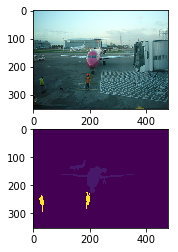

In [19]:
f, axarr = plt.subplots(2)
axarr[0].imshow(batch_image[0])
axarr[1].imshow(np.squeeze(batch_labels[0]))

In [20]:
print(batch_labels[0,200:220,190:210])

[[[0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  [0]


In [25]:
print(batch_labels[0,255:285,25:45])

[[[15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]

 [[15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]

 [[15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]

 [[15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]

 [[15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]

 [[15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]

 [[15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [15]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]

 [[15]

In [26]:
label = batch_labels[0]
label_shape = batch_labels.shape
labels_mask = np.zeros((label_shape[1], label_shape[2], 0), dtype="uint8")

for mask_id in range(0,21):
    binary_mask = np.equal(label, mask_id).astype("uint8")
    labels_mask = np.concatenate((labels_mask, binary_mask), axis=2)
    
assert (labels_mask.dtype) == "uint8"

In [27]:
print(labels_mask.shape)

(352, 480, 21)


In [24]:
#print(labels_mask[0,110:120,80:90,])
print(np.argmax(labels_mask))

0
